In [5]:
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense,Flatten,BatchNormalization,Convolution2D,MaxPooling2D,Activation
#from keras.applications.
from keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pickle
import numpy as np
from keras.layers import Dropout
import keras.backend as K
import matplotlib.pyplot as plt
from keras import regularizers
import cv2
import os, sys
import pickle
import numpy as np
import numpy
from os import path
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import random
from PIL import Image
from PIL import ImageEnhance
import scipy.misc
from mtcnn.mtcnn import MTCNN
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, Sequence
from keras import backend as K
import tensorflow as tf
from keras.applications.vgg16 import VGG16
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [6]:
detector = MTCNN()
def detectFace(detector,image_path, image_name):
    imgAbsPath = os.path.join(image_path,image_name)
    img = cv2.imread(imgAbsPath)
    faces = detector.detect_faces(img)
    resized_im = np.ones((3,3))
    if len(faces) == 1:
        bbox = faces[0]["box"]
        x,y,w,h = bbox
        (xmin,ymin),(xmax,ymax) = (x,y),(x+w,y+h)
        croped_im = img[y:y+h,x:x+w,:]
        #print(croped_im.shape)
        try :
            resized_im = cv2.resize(croped_im, (240,180))
        except :
            pass

#         if resized_im.shape[0] != 224 or resized_im.shape[1] != 224:
#             print("invalid shape")

        # cv2.imwrite(image_name, resized_im)
#     else:
#         print(image_name+" error " + str(len(faces)))
    return resized_im

In [7]:
label_file = "/home/minhhv/dung/face/SCUT-FBP5500_v2/train_test_files/All_labels.txt"
label = pd.read_csv(label_file,sep=" ",header=None)
label.columns = ["name_image","score"]
name_images = label["name_image"]
scores = label["score"]
print("Done")

Done


In [8]:
data_train = []
target = []
for image,score in zip(name_images,scores):
    if image.startswith("AF"):
        img = detectFace(detector,"Images", image)
        #print(img.shape)
        #if (img.shape[0]==224) and(img.shape[1]==224):
        if (img.shape[0] == 180)and((img.shape[1]) == 240) :
            img_flip =  cv2.flip(img,1)
            all_image = [img,img_flip]
            for im in all_image:
                data_train.append(im)
                target.append(score)

In [5]:
def custom_activation(x):
    return K.relu(x,max_value =5)
with tf.Session() as ss :
    print(ss.run(custom_activation(5)))

5


In [9]:
# vgg = VGG16(include_top=False, input_shape=(180,240,3))
# #vgg.summary()
# model = Sequential()
# model.add(vgg)
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(128, activation=custom_activation))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
# model.add(Dense(32, activation=custom_activation))
# model.add(BatchNormalization())
# model.add(Dense(1, activation=custom_activation))
# model.layers[0].trainable = True
# print (model.summary())

# #model.load_weights('model-dropout/model-ldl-resnet-base.h5')
# sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])

In [18]:
model = Sequential()

# uses theano ordering. Note that we leave the image size as None to allow multiple image sizes
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(180,240,3)))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))          
model.add(Convolution2D(64, 3, 3))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3))
model.add(Convolution2D(256, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])
print (model.summary())

/home/minhhv/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(180, 240,..., padding="same")`
  after removing the cwd from sys.path.
/home/minhhv/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
/home/minhhv/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if __name__ == '__main__':
/home/minhhv/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/home/minhhv/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 180, 240, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 178, 238, 32)      9248      
_________________________________________________________________
activation_9 (Activation)    (None, 178, 238, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 178, 238, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 89, 119, 32)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 87, 117, 64)       18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 85, 115, 64)       36928     
__________

In [12]:
X = np.array(data_train)/255.
y  = np.array(target).reshape((-1,1))/5
#y = to_categorical(y,num_classes=5)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10,shuffle=True)

In [13]:
print(X.shape)
print(y.shape)

(3836, 180, 240, 3)
(3836, 1)


In [19]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')
weight_path = 'model/regression_model_sigmoid_1.h5'
ckp = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
history = model.fit(x=x_train, y=y_train, batch_size=32, callbacks=[earlyStopping,ckp], epochs=200,
                    verbose=1, validation_data=(x_test,y_test))

Train on 3068 samples, validate on 768 samples
Epoch 1/200
3068/3068 [==============================] - 10s 3ms/step - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0511 - val_mean_squared_error: 0.0511

Epoch 00001: val_loss improved from inf to 0.05115, saving model to model/regression_model_sigmoid_1.h5
Epoch 2/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0226 - val_mean_squared_error: 0.0226

Epoch 00002: val_loss improved from 0.05115 to 0.02264, saving model to model/regression_model_sigmoid_1.h5
Epoch 3/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0233 - val_mean_squared_error: 0.0233

Epoch 00003: val_loss did not improve
Epoch 4/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0226 - val_mean_squared_error: 0.0226

Epoch 00004: val_loss did not improve


3068/3068 [==============================] - 9s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0120 - val_mean_squared_error: 0.0120

Epoch 00035: val_loss did not improve
Epoch 36/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0110 - val_mean_squared_error: 0.0110

Epoch 00036: val_loss improved from 0.01123 to 0.01100, saving model to model/regression_model_sigmoid_1.h5
Epoch 37/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0114 - val_mean_squared_error: 0.0114

Epoch 00037: val_loss did not improve
Epoch 38/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0113 - val_mean_squared_error: 0.0113

Epoch 00038: val_loss did not improve
Epoch 39/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_los

3068/3068 [==============================] - 9s 3ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0093 - val_mean_squared_error: 0.0093

Epoch 00071: val_loss did not improve
Epoch 72/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0091 - val_mean_squared_error: 0.0091

Epoch 00072: val_loss did not improve
Epoch 73/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0090 - val_mean_squared_error: 0.0090

Epoch 00073: val_loss improved from 0.00903 to 0.00897, saving model to model/regression_model_sigmoid_1.h5
Epoch 74/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0090 - val_mean_squared_error: 0.0090

Epoch 00074: val_loss did not improve
Epoch 75/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_los


Epoch 00108: val_loss did not improve
Epoch 109/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0085 - val_mean_squared_error: 0.0085

Epoch 00109: val_loss did not improve
Epoch 110/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0082 - val_mean_squared_error: 0.0082

Epoch 00110: val_loss did not improve
Epoch 111/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0085 - val_mean_squared_error: 0.0085

Epoch 00111: val_loss did not improve
Epoch 112/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0082 - val_mean_squared_error: 0.0082

Epoch 00112: val_loss did not improve
Epoch 113/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0083 - v


Epoch 00184: val_loss did not improve
Epoch 185/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0077 - val_mean_squared_error: 0.0077

Epoch 00185: val_loss did not improve
Epoch 186/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0076 - val_mean_squared_error: 0.0076

Epoch 00186: val_loss did not improve
Epoch 187/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00187: val_loss improved from 0.00750 to 0.00750, saving model to model/regression_model_sigmoid_1.h5
Epoch 188/200
3068/3068 [==============================] - 9s 3ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0074 - val_mean_squared_error: 0.0074

Epoch 00188: val_loss improved from 0.00750 to 0.00738, saving model to model/regression_model_sigmoid_1.

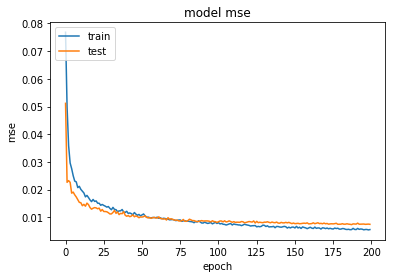

In [20]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
# summarize history for acc
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

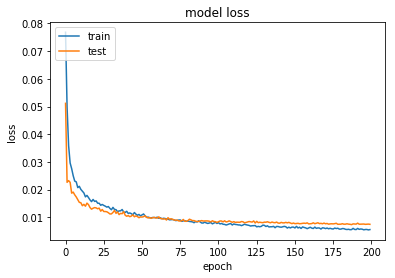

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  0.,   0.,  24.,  90., 337., 565., 354., 395., 228.,   7.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

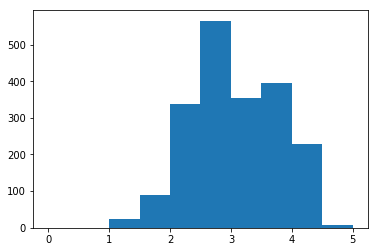

In [37]:
plt.hist(score_female,bins=10,range=(0,5))

In [26]:
score_female = []
for image,score in zip(name_images,scores):
    if image.startswith("AF"):
        score_female.append(score)

In [27]:
len(score_female)

2000

In [33]:
score_female

[2.916667,
 3.933333,
 2.3,
 2.95,
 2.583333,
 3.1333330000000004,
 3.166667,
 2.45,
 2.666667,
 3.1333330000000004,
 3.2833330000000003,
 2.683333,
 2.683333,
 3.0333330000000003,
 3.2166669999999997,
 3.1333330000000004,
 2.85,
 3.833333,
 2.3833330000000004,
 2.1166669999999996,
 2.333333,
 2.416667,
 2.15,
 3.816667,
 2.7833330000000003,
 2.1333330000000004,
 3.166667,
 3.05,
 3.1333330000000004,
 3.016667,
 2.566667,
 3.8,
 3.516667,
 3.7166669999999997,
 2.8833330000000004,
 1.95,
 2.583333,
 2.433333,
 2.816667,
 2.75,
 2.8666669999999996,
 3.6333330000000004,
 3.4666669999999997,
 4.0,
 3.166667,
 2.916667,
 4.283333,
 2.1166669999999996,
 2.7833330000000003,
 2.766667,
 2.766667,
 3.516667,
 3.8833330000000004,
 3.65,
 3.6166669999999996,
 2.566667,
 2.566667,
 2.0,
 3.85,
 4.133333,
 2.2166669999999997,
 3.5,
 2.7,
 4.066667,
 2.833333,
 2.516667,
 3.683333,
 3.3666669999999996,
 2.2833330000000003,
 2.3666669999999996,
 3.6,
 2.95,
 2.766667,
 2.6166669999999996,
 2.86666699